<a href="https://colab.research.google.com/github/JeevanJayakumar/Jeevan_24-14-13/blob/main/Assn3_Jeevan_Jayakumar_24_14_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Assignment:3
# Name: Jeevan Jayakumar
# Reg NO: 24-14-13
# Programme: M.Tech Modeling and Simulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Q1

In [3]:
def dteta(X,Y):
  X_t=X.T
  X_tX=np.dot(X_t,X)
  X_ty=np.dot(X_t,Y)
  theta=np.linalg.inv(X_tX).dot(X_ty)
  return theta

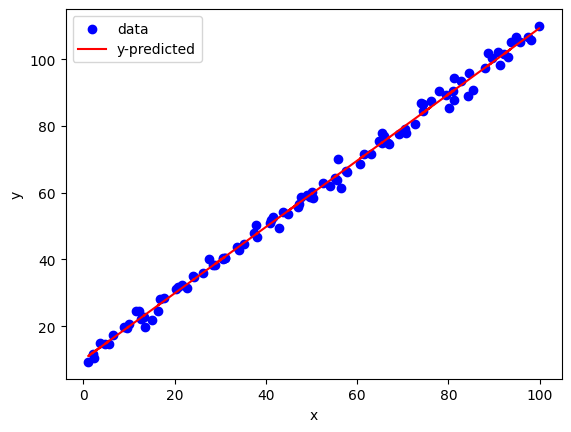

In [5]:
x=np.linspace(1,99,100).reshape(-1,1)+np.random.randn(100,1)
y=x+10+np.random.randn(100,1)*2
X=np.hstack((np.ones((100,1)),x))
theta=dteta(X,y)
y_cap=X.dot(theta)

plt.scatter(x,y,label="data",color='blue')
plt.plot(x,y_cap,color='red',label="y-predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [6]:
# Q2

In [7]:
def poly_regression(X,Y,degree=2):
  X_poly=np.zeros((X.shape[0],degree+1))
  for i in range(degree+1):
    X_poly[:,i]=X[:,0]**i

  theta=dteta(X_poly,Y)
  return theta

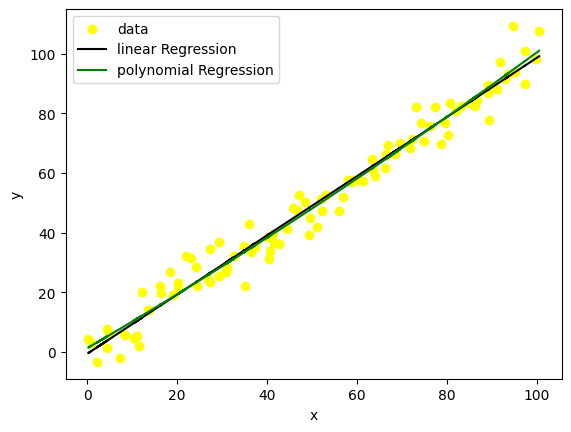

In [9]:
x=np.linspace(1,99,100).reshape(-1,1)+np.random.randn(100,1)
y=x+np.random.randn(100,1)*5
X=np.hstack((np.ones((100,1)),x))
theta_linear=dteta(X,y)
pred_linear=X.dot(theta_linear)
theta_poly=poly_regression(x,y)
X_poly=np.zeros((x.shape[0],3))
for i in range(3):
  X_poly[:,i]=x[:,0]**i
pred_poly=X_poly.dot(theta_poly)

plt.scatter(x,y,label="data",color='yellow')
plt.plot(x,pred_linear,color='black',label="linear Regression")
plt.plot(x,pred_poly,color='green',label="polynomial Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [10]:
# Q3

**0.0.1 Outliers**

Outliers are data points which devidate significantly from the grneral trend. It can impact the performance of model by affecting the regression parameters leading to increase bias and reduced accuracy.

**0.0.2 Detection**

**Z score** By calculating Z score of each data point we can determine how much far the point is and data points outside a certain threshold  can be regarded as outlinera. Z=(x-mean)/std

**0.0.3 Removal**

Outline can be removed by

1.By deletion
2.By replacingoutlier values with certain percentile of orginal point
3.Replace with nearest value within the range

In [13]:
def Z_score(data,threshold=3):
  zscore=(data-np.mean(data))/np.std(data)
  outliners=np.where(np.abs(zscore)>threshold)[0]
  return outliners

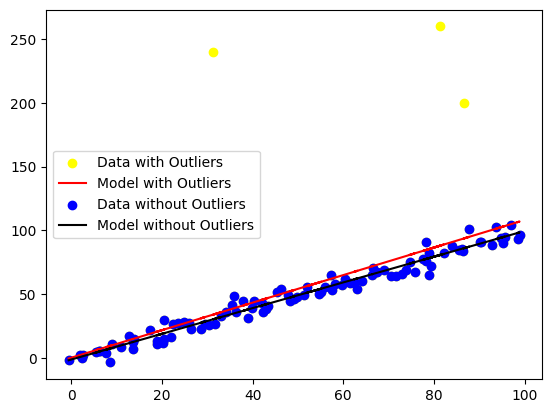

In [17]:
np.random.seed(50)
x=np.linspace(1,99,100)+np.random.randn(100)
y=x+np.random.randn(100)*5

y[80]=260
y[32]=240
y[89]=200

outlines_z=Z_score(y)

y_clean=np.delete(y,outlines_z)
x_clean=np.delete(x,outlines_z)

model_with_outliners=np.polyfit(x,y,1)
model_without_outliners=np.polyfit(x_clean,y_clean,1)

plt.scatter(x,y,label="Data with Outliers",color='yellow')
plt.plot(x,np.polyval(model_with_outliners,x),color="red",label='Model with Outliers')
plt.scatter(x_clean,y_clean,label="Data without Outliers",color='blue')
plt.plot(x,np.polyval(model_without_outliners,x),color="black",label='Model without Outliers')
plt.legend()
plt.show()